## Исследование продаж по видео играм

<img src='games.jpg' style='width:500px;height:350px'/>

 В комании "Тралала", которая является ведущей в области анализа игр, пришел некоторый заказ на исследование. В котором необходимо найти/рассчитать следующие показатели:

 1. Выполнить поиск игры/игр, которую/ые выпускали на максимальном числе данных нам платформ;
 2. Рассчитать топ-3 и антитоп-3 издателя по количеству дохода используя данные Северной Америки и Японии;
 3. Рассчитать на какую платформу выпустили больше всего игр;
 4. Вычислить сколько денег принесла каждая игра в общемировом масштабе;
 5. Изобразить как росло количество издаваемых игр каждый год.

## Загрузка данных и подготовка к анализу

In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
##import warnings

##warnings.filterwarnings("ignore")
sns.set_style('darkgrid')

In [51]:
try:
    df_sales = pd.read_csv('game_sales.csv')
except:
    print('Ошибка, проверьте правильность заполненных данных')
else:
    print('Данные успешно загружены')


Данные успешно загружены


In [52]:
def get_info(data):
    display(data.head().style.set_caption('Общая информация по датасету'))
    display(data.describe().T)
    print('----')
    print('Информация о пропусках и типах данных')
    print('----')
    print()
    display(data.info())
    print('----')
    print()

In [53]:
get_info(df_sales)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Wii Sports,Wii,2006.000000,Sports,Nintendo,41.490000,29.020000,3.770000,8.460000
1,Super Mario Bros.,NES,1985.000000,Platform,Nintendo,29.080000,3.580000,6.810000,0.770000
2,Mario Kart Wii,Wii,2008.000000,Racing,Nintendo,15.850000,12.880000,3.790000,3.310000
3,Wii Sports Resort,Wii,2009.000000,Sports,Nintendo,15.750000,11.010000,3.280000,2.960000
4,Pokemon Red/Pokemon Blue,GB,1996.000000,Role-Playing,Nintendo,11.270000,8.890000,10.220000,1.000000


,count,mean,std,min,25%,50%,75%,max
Year,16327.0,2006.406443,5.828981,1980.0,2003.0,2007.00,2010.00,2020.00
NA_Sales,16598.0,0.264667,0.816683,0.0,0.0,0.08,0.24,41.49
EU_Sales,16598.0,0.146652,0.505351,0.0,0.0,0.02,0.11,29.02
JP_Sales,16598.0,0.077782,0.309291,0.0,0.0,0.00,0.04,10.22
Other_Sales,16598.0,0.048063,0.188588,0.0,0.0,0.01,0.04,10.57


----
Информация о пропусках и типах данных
----

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         16598 non-null  object 
 1   Platform     16598 non-null  object 
 2   Year         16327 non-null  float64
 3   Genre        16598 non-null  object 
 4   Publisher    16540 non-null  object 
 5   NA_Sales     16598 non-null  float64
 6   EU_Sales     16598 non-null  float64
 7   JP_Sales     16598 non-null  float64
 8   Other_Sales  16598 non-null  float64
dtypes: float64(5), object(4)
memory usage: 1.1+ MB


None

----



-------------------------------------

df_sales — результат запроса. В нём содержится следующая информация:

- Name - Название игры
- Platform - Платформа выпуска игры (т.е. PC, PS4 и т.д.)
- Year - Год выпуска игры
- Genre - Жанр игры
- Publisher - Издатель игры
- NA_Sales - Продажи в Северной Америке (в миллионах)
- EU_Sales - Продажи в Европе (в миллионах)
- JP_Sales - Продажи в Японии (в миллионах)
- Other_Sales - Продажи в остальном мире (в миллионах)

Пропуски наблюдаются в колонках 'Year' - 271 и 'Publisher' - 58, Пропуски изучим и примем решение, что с ними делать. Особой необходимости преобразовывать типы нет, для даты в нашем случае будет подходить и тип float, но для удобства можно преобразовать в int.

Для количества продаж устраивает float64 - вещественные числа. Можно немного уменьшить занимаемую память, понизив тип до float16.

-------------------------------------

### Понижение используемой памяти.

In [54]:
df_sales = df_sales.astype({'NA_Sales': 'float16', 
                             'EU_Sales': 'float16', 
                             'JP_Sales': 'float16', 
                             'Other_Sales': 'float16'})

### Наличие дубликатов в сете данных.

In [62]:
df_sales.duplicated().sum()

1

Найден один дубликат, посмотрим на него.

In [63]:
df_sales[df_sales.duplicated(keep=False) == True]

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
14997,Wii de Asobu: Metroid Prime,Wii,NaN,Shooter,Nintendo,0.0,0.0,0.020004,0.0
14999,Wii de Asobu: Metroid Prime,Wii,NaN,Shooter,Nintendo,0.0,0.0,0.020004,0.0


Необходимости оставлять дубликат никакой нет, поэтому произведем дроп.

In [65]:
df_sales = df_sales.drop_duplicates()

In [66]:
df_sales.duplicated().sum()

0

Теперь мы можем перейти к пропускам и их обработке

### Столбец Year.

После удаления дубликата на единицу уменьшились пропуски в столбце 'Year'

In [67]:
print('Количество пропусков в столбце Year', len(df_sales[df_sales['Year'].isna()]))

Количество пропусков в столбце Year 270


In [68]:
df_sales['Year'].unique()

array([2006., 1985., 2008., 2009., 1996., 1989., 1984., 2005., 1999.,
       2007., 2010., 2013., 2004., 1990., 1988., 2002., 2001., 2011.,
       1998., 2015., 2012., 2014., 1992., 1997., 1993., 1994., 1982.,
       2003., 1986., 2000.,   nan, 1995., 2016., 1991., 1981., 1987.,
       1980., 1983., 2020., 2017.])

270 пропусков по столбцу год. Проводить иследование и восстанавливать 270 строку слишком громоздко. Заменим на 0, при визуализации исключим из данных строки с этим значением.

In [71]:
df_sales['Year'] = df_sales['Year'].fillna(0)
print(f'Количество пропусков в столбце Year {len(df_sales[df_sales["Year"].isna()])}')

Количество пропусков в столбце Year 0


### Столбец Publisher

In [72]:
print('Количество пропусков в столбце Publisher', len(df_sales[df_sales['Publisher'].isna()]))

Количество пропусков в столбце Publisher 58


In [73]:
df_sales[df_sales['Publisher'].isna()].head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
470,wwe Smackdown vs. Raw 2006,PS2,0.0,Fighting,NaN,1.570312,1.019531,0.0,0.409912
1303,Triple Play 99,PS,0.0,Sports,NaN,0.810059,0.549805,0.0,0.099976
1662,Shrek / Shrek 2 2-in-1 Gameboy Advance Video,GBA,2007.0,Misc,NaN,0.870117,0.320068,0.0,0.020004
2222,Bentley's Hackpack,GBA,2005.0,Misc,NaN,0.669922,0.250000,0.0,0.020004
3159,Nicktoons Collection: Game Boy Advance Video V...,GBA,2004.0,Misc,NaN,0.459961,0.170044,0.0,0.010002


Провели исследование. Обнаружить и привязать данные параметры к Издателю игры не удастся. Заменим название на unknown. Удалять строки не будем. В случае, если будут ошибки, исключим из анализа с помощью запроса.

In [75]:
df_sales['Publisher'] = df_sales['Publisher'].fillna('unknown')
print('Количество пропусков в столбце Publisher', len(df_sales[df_sales['Publisher'].isna()]))

Количество пропусков в столбце Publisher 0


### Преобразование данных в иные типы

In [77]:
df_sales = df_sales.astype({'Year': 'int16'}) 

In [78]:
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16597 entries, 0 to 16597
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         16597 non-null  object 
 1   Platform     16597 non-null  object 
 2   Year         16597 non-null  int16  
 3   Genre        16597 non-null  object 
 4   Publisher    16597 non-null  object 
 5   NA_Sales     16597 non-null  float16
 6   EU_Sales     16597 non-null  float16
 7   JP_Sales     16597 non-null  float16
 8   Other_Sales  16597 non-null  float16
dtypes: float16(4), int16(1), object(4)
memory usage: 810.4+ KB


-------------------------------------
Незначительно сэкономили занимаемую память и избавились от nan значений.

-------------------------------------

## 1. Выполнить поиск игры/игр, которую/ые выпускали на максимальном числе данных нам платформ.

In [79]:
df_sales[df_sales['Name'] == df_sales['Name'].value_counts().idxmax()].sort_values(by='Year')

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
252,Need for Speed: Most Wanted,PS2,2005,Racing,Electronic Arts,2.029297,1.790039,0.080017,0.469971
1530,Need for Speed: Most Wanted,X360,2005,Racing,Electronic Arts,1.000000,0.170044,0.020004,0.099976
2005,Need for Speed: Most Wanted,XB,2005,Racing,Electronic Arts,0.529785,0.459961,0.000000,0.049988
3585,Need for Speed: Most Wanted,GC,2005,Racing,Electronic Arts,0.429932,0.109985,0.000000,0.020004
5900,Need for Speed: Most Wanted,PC,2005,Racing,Electronic Arts,0.020004,0.229980,0.000000,0.049988
6278,Need for Speed: Most Wanted,DS,2005,Racing,Electronic Arts,0.239990,0.010002,0.000000,0.020004
6492,Need for Speed: Most Wanted,GBA,2005,Racing,Electronic Arts,0.189941,0.070007,0.000000,0.000000
498,Need for Speed: Most Wanted,PS3,2012,Racing,Electronic Arts,0.709961,1.509766,0.059998,0.609863
1173,Need for Speed: Most Wanted,X360,2012,Racing,Electronic Arts,0.620117,0.799805,0.010002,0.150024
1742,Need for Speed: Most Wanted,PSV,2012,Racing,Electronic Arts,0.379883,0.520020,0.010002,0.250000


-------------------------------------
Смотря на вывод, можно обратить внимание на большой промежуток в годах между выпусками. В нашем случае рассматриваются две разные игры, хоть и имеющие одно название. Данное предположение можно проверить с помощью Google. По результату мы можем сказать что данный вывод является неверным и нам не подходит. 

-------------------------------------

<img src='MW_2005.png' style='width:250px;height:350px'/>
<img src='MW_2012.png' style='width:250px;height:350px'/>

In [80]:
df_sales['Name'].value_counts()[1:]

Ratatouille                                9
FIFA 14                                    9
LEGO Marvel Super Heroes                   9
Madden NFL 07                              9
Cars                                       8
                                          ..
Ar tonelico Qoga: Knell of Ar Ciel         1
Galaga: Destination Earth                  1
Nintendo Presents: Crossword Collection    1
TrackMania: Build to Race                  1
Know How 2                                 1
Name: Name, Length: 11492, dtype: int64

-------------------------------------
Просмотрев следующее число платформ заметим что у нас идут сразу четыре игры, поэтому мы выведем их все.

-------------------------------------

In [81]:
df_sales[df_sales['Name'] == df_sales['Name'].value_counts()[1:].idxmax()][['Name', 'Platform']]

,Name,Platform
1578,Ratatouille,DS
2445,Ratatouille,PS2
3029,Ratatouille,PSP
3851,Ratatouille,PS3
3857,Ratatouille,Wii
6383,Ratatouille,X360
7703,Ratatouille,GBA
9025,Ratatouille,GC
14395,Ratatouille,PC


In [82]:
df_sales[df_sales['Name'] == df_sales['Name'].value_counts()[2:].idxmax()][['Name', 'Platform']]

,Name,Platform
112,FIFA 14,PS3
256,FIFA 14,X360
493,FIFA 14,PS4
1698,FIFA 14,XOne
3988,FIFA 14,PSV
4503,FIFA 14,PC
4538,FIFA 14,Wii
6661,FIFA 14,3DS
7034,FIFA 14,PSP


In [85]:
df_sales[df_sales['Name'] == df_sales['Name'].value_counts()[3:].idxmax()][['Name', 'Platform']]

,Name,Platform
690,LEGO Marvel Super Heroes,X360
846,LEGO Marvel Super Heroes,PS3
1193,LEGO Marvel Super Heroes,PS4
2007,LEGO Marvel Super Heroes,XOne
2344,LEGO Marvel Super Heroes,3DS
2774,LEGO Marvel Super Heroes,WiiU
3080,LEGO Marvel Super Heroes,PSV
4056,LEGO Marvel Super Heroes,DS
8095,LEGO Marvel Super Heroes,PC


In [86]:
df_sales[df_sales['Name'] == df_sales['Name'].value_counts()[4:].idxmax()][['Name', 'Platform']]

,Name,Platform
240,Madden NFL 07,PS2
964,Madden NFL 07,X360
2037,Madden NFL 07,XB
2484,Madden NFL 07,PSP
3246,Madden NFL 07,GC
3862,Madden NFL 07,PS3
3975,Madden NFL 07,Wii
7277,Madden NFL 07,DS
14814,Madden NFL 07,GBA


-------------------------------------

Лидирующие позиции в самых многоплатформенных играх занимают - 'FIFA 14', 'Ratatouille', 'LEGO Marvel Super Heroes', 'Madden NFL 07'. Так же можно заметить, что названия некоторых платформ есть в одних играх, но нет в других. Поэтому можно сделать вывод, что игры содержат не одно и то же множество платформ.

-------------------------------------

## 2. Рассчитать топ-3 и антитоп-3 издателя по количеству дохода используя данные Северной Америки и Японии.

### Америка

In [87]:
df_sales.groupby(by='Publisher').sum().nlargest(3, 'NA_Sales')['NA_Sales']

Publisher
Nintendo           817.00
Electronic Arts    595.00
Activision         429.75
Name: NA_Sales, dtype: float16

In [88]:
df_sales.groupby(by='Publisher').sum().nsmallest(3, 'NA_Sales')['NA_Sales']

Publisher
2D Boy      0.0
49Games     0.0
7G//AMES    0.0
Name: NA_Sales, dtype: float16

-------------------------------------

Результаты вывода по Северной Америке показывают, что самые высокие позиции доходах у:
- Nintendo - $817 миллиона

- Electronic Arts - $595 миллиона

- Activision - $429.75 миллиона 

А самые низкие:
- 2D Boy - $0.0 миллиона 

- 49Games - $0.0 миллиона 

- 7G//AMES - $0.0 миллиона 

В результатах мы видим, что у антитопа прослеживаются нулевые доходы. Возможно это связанно с тем, что доходы компании были настолько малы, что данные в итоге не могут поддержаться, либо же эти компании не участвовали на американском рынке.

-------------------------------------

### Япония

In [89]:
df_sales.groupby(by='Publisher').sum().nlargest(3, 'JP_Sales')['JP_Sales']

Publisher
Nintendo                        455.5000
Namco Bandai Games              127.0625
Konami Digital Entertainment     91.3125
Name: JP_Sales, dtype: float16

In [90]:
df_sales.groupby(by='Publisher').sum().nsmallest(3, 'JP_Sales')['JP_Sales']

Publisher
10TACLE Studios                 0.0
1C Company                      0.0
20th Century Fox Video Games    0.0
Name: JP_Sales, dtype: float16

-------------------------------------
Результаты же вывода по Японии показывают что самые высокие позиции в доходах у:
- Nintendo - $455.5 миллиона

- Namco Bandai Games - $127 миллиона

- Konami Digital Entertainment - $91.3 миллиона

А самые низкие:
- 10TACLE Studios - $0.0 миллиона

- 1C Company - $0.0 миллиона

- 20th Century Fox Video Games - $0.0 миллиона

В случае же с самыми малыми доходами мы можем наблюдать ту же картину что и на американском рынке. Либо доходы компании малы, либо они не участвовали в японском рынке

-------------------------------------

## 3. Рассчитать на какую платформу выпустили больше всего игр.

In [91]:
df_sales.value_counts('Platform').nlargest(1)

Platform
DS    2163
dtype: int64

In [92]:
df_sales.value_counts('Platform').nlargest(2)

Platform
DS     2163
PS2    2161
dtype: int64

-------------------------------------
В результате мы можем заметить, что большинство игр вышло на Nintendo DS. Что примечательно, другая платформа 
так же японского производителя - Sony PS2, отстала всего на 2 позиции в нашем DataFrame от лидирующего места. 


-------------------------------------

## 4. Вычислить сколько денег принесла каждая игра в общемировом масштабе.


In [93]:
df_sales['World_Sales'] = df_sales['NA_Sales'] + df_sales['EU_Sales'] + \
                          df_sales['JP_Sales'] + df_sales['Other_Sales']

In [94]:
df_sales.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,World_Sales
0,Wii Sports,Wii,2006,Sports,Nintendo,41.500000,29.015625,3.769531,8.460938,82.68750
1,Super Mario Bros.,NES,1985,Platform,Nintendo,29.078125,3.580078,6.808594,0.770020,40.25000
2,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.851562,12.882812,3.789062,3.310547,35.84375
3,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.750000,11.007812,3.279297,2.960938,33.00000
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.273438,8.890625,10.218750,1.000000,31.37500


-------------------------------------

С помощью сложения каждого столбца по каждой строке мы добились результата характеризующий мировой доход по каждой игре в нашем DataFrame. Теперь, когда нам известен мировой доход, мы сможем вычислять во сколько раз конкретная игра заработала больше/меньше другой или рассчитать процентный доход игры отсносительно издателя который выпустил ее.

-------------------------------------

## 5. Изобразить как росло количество издаваемых игр каждый год.

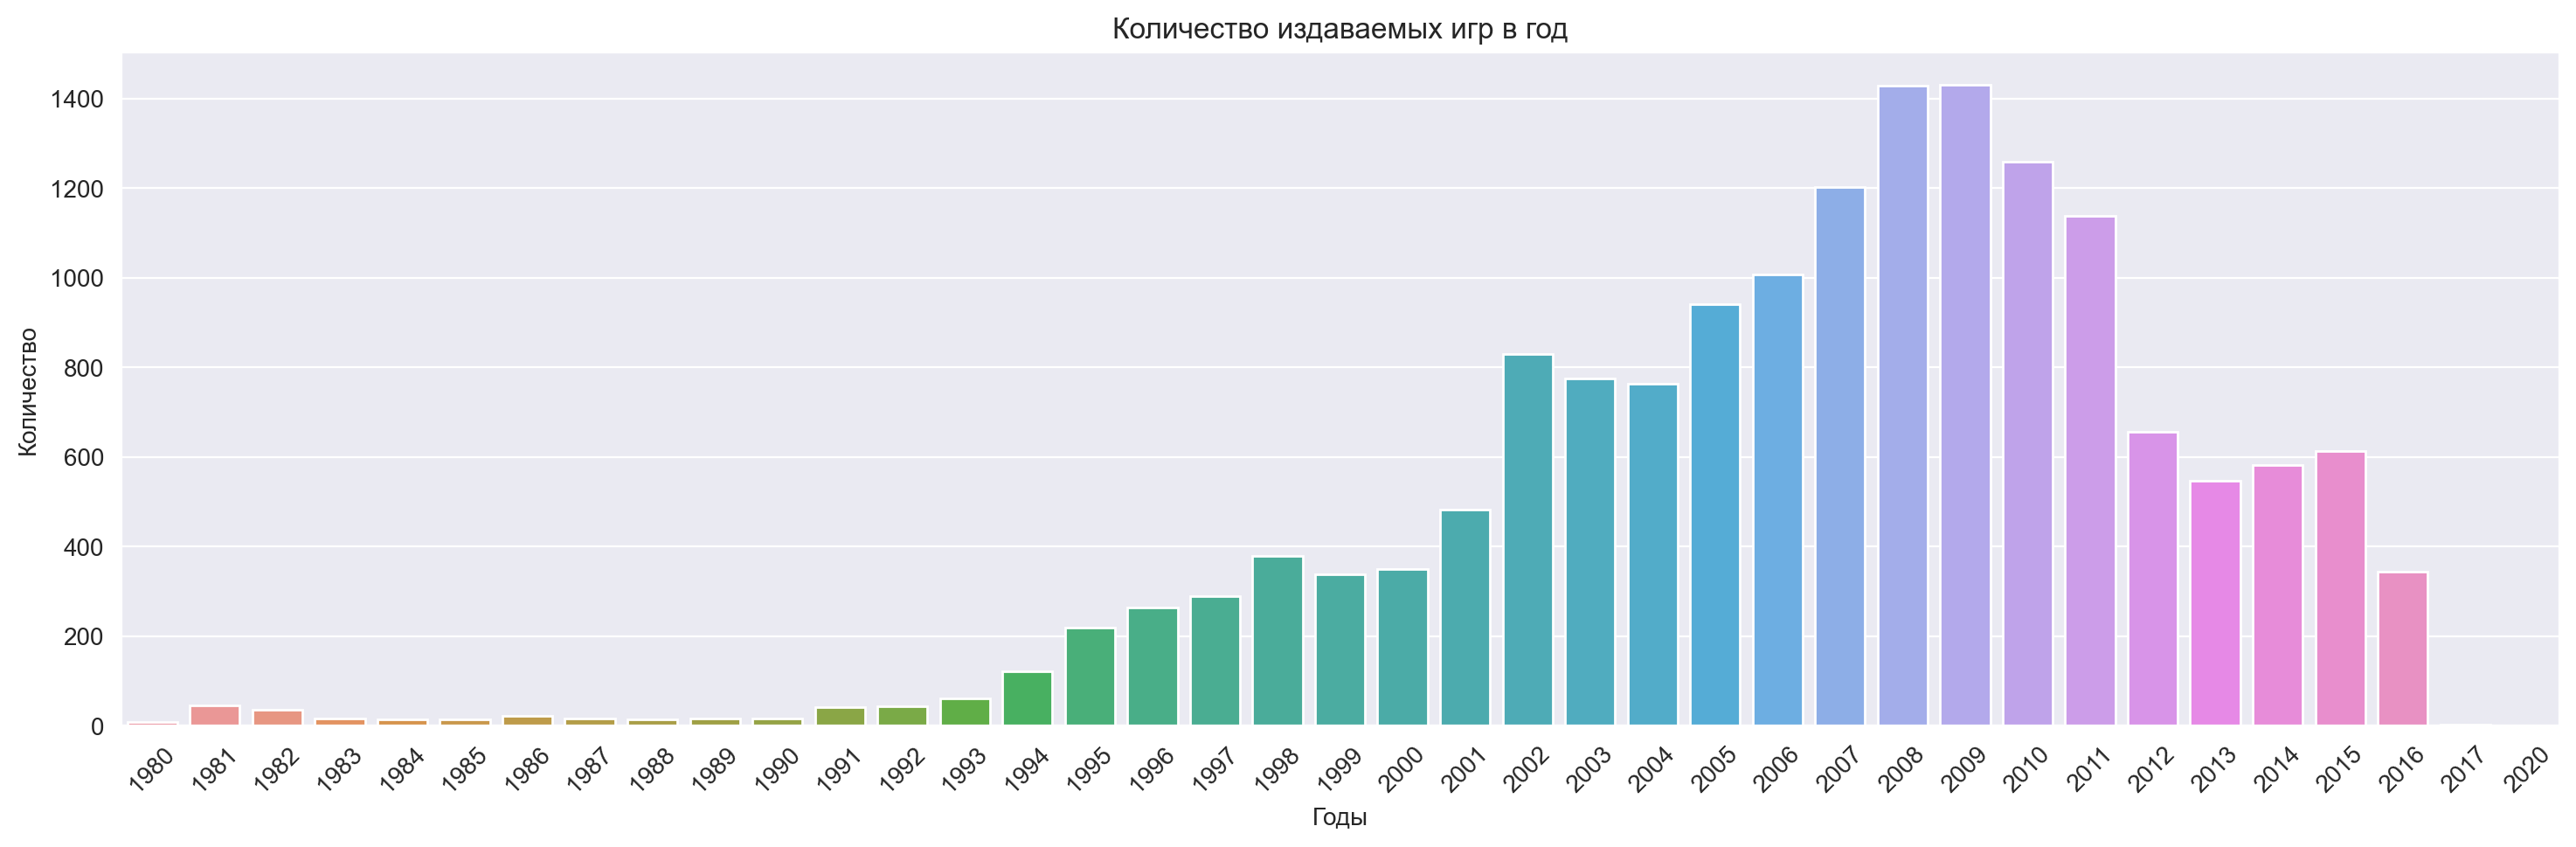

In [100]:
plt.figure(figsize=(18, 5), dpi=200)
plt.xticks(rotation=45)
plt.title("Количество издаваемых игр в год")

sns.countplot(data=df_sales[df_sales['Year'] > 0], x='Year')

plt.xlabel("Годы")
plt.ylabel("Количество")

plt.show()

In [97]:
df_sales.groupby(by='Year').count()['Name'].sort_values(ascending=False).head()

Year
2009    1431
2008    1428
2010    1259
2007    1202
2011    1139
Name: Name, dtype: int64

In [98]:
df_sales.groupby(by='Year').count()['Name'].sort_values(ascending=True).head(5)

Year
2020     1
2017     3
1980     9
1984    14
1985    14
Name: Name, dtype: int64

------------------------------------
Наиболее результативные года - 2009, 2008

Наименее результативные года - 2020, 2017

Так же на графике мы можем наблюдать как с 1991 года пошел активный рост количества игр, пик которого был в 2009 году и составлял 1431 игры с последующим уменьшением количества до всего одной к 2020 году.


-------------------------------------

## Вывод

- Из csv-файла извлекли необходмые данные - типы данных не требуют преобразования, пропуски были найдены в двух колонка и обработаны.


- Наиболее многоплатформенные игры -  'FIFA 14', 'Ratatouille', 'LEGO Marvel Super Heroes', 'Madden NFL 07'. Эти игры были выпущенны на 9 различных платформах


- Лидирующие позиции по выручке:

     - Америке - Nintendo, EA, Activision

     - Японии - Nintendo, Namco Bandai Games , Konami Digital Entertainment
     

- Платформа на которую выпускали чаще всего игры - Nintendo DS. При анализе было обнаруженно, что платформа DS ушла на 2 позиции больше, чем другая платформа от другого японского гиганта Sony - PS2


- Так же было выяснено сколько каждая игра принесла в общемировом масштабе для того, чтобы производить по необходимости более глубокий анализ причастности каждой игры к определенному показателю


- Был сделан показательный график количества выпускаемых игр в каждый год:
    -  2009 и 2008 - самые результативные года с точки зрения количества выпускаемых игр
    -  2020 и 2017 - оказались самыми наименнее результативными годами.